# Model Development and Evaluation - Heart Disease Prediction

This notebook develops and evaluates multiple classification models for heart disease prediction.


## 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Add project root to path
PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT))

# Sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
)

# Project imports
from src.data.preprocessing import HeartDiseasePreprocessor, prepare_features_target

print(f"Project root: {PROJECT_ROOT}")


Project root: /Users/a0k04ou/Desktop/MLOPs


## 2. Load and Prepare Data


In [2]:
# Load processed data
data_path = PROJECT_ROOT / "data" / "processed" / "heart_disease_processed.csv"
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nTarget distribution:")
print(df['target'].value_counts())

# Prepare features and target
X, y = prepare_features_target(df)
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")


Dataset shape: (920, 14)

Target distribution:
target
1    509
0    411
Name: count, dtype: int64

Features shape: (920, 13)
Target shape: (920,)


## 3. Train-Test Split


In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTrain target distribution:")
print(y_train.value_counts())
print(f"\nTest target distribution:")
print(y_test.value_counts())


Train set: 736 samples
Test set: 184 samples

Train target distribution:
target
1    407
0    329
Name: count, dtype: int64

Test target distribution:
target
1    102
0     82
Name: count, dtype: int64


## 4. Feature Preprocessing


In [4]:
# Initialize and fit preprocessor
preprocessor = HeartDiseasePreprocessor()
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print(f"Preprocessed train shape: {X_train_scaled.shape}")
print(f"Preprocessed test shape: {X_test_scaled.shape}")


Preprocessed train shape: (736, 13)
Preprocessed test shape: (184, 13)


## 5. Model 1: Logistic Regression


In [5]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=cv, scoring='roc_auc')

print("Logistic Regression Results:")
print("=" * 60)
print(f"Accuracy:  {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"ROC-AUC:   {lr_roc_auc:.4f}")
print(f"CV ROC-AUC: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std()*2:.4f})")
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy:  0.8261
Precision: 0.8431
Recall:    0.8431
ROC-AUC:   0.8940
CV ROC-AUC: 0.8804 (+/- 0.0407)

Confusion Matrix:
[[66 16]
 [16 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        82
           1       0.84      0.84      0.84       102

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



## 6. Model 2: Random Forest


In [6]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=cv, scoring='roc_auc')

print("Random Forest Results:")
print("=" * 60)
print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"ROC-AUC:   {rf_roc_auc:.4f}")
print(f"CV ROC-AUC: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std()*2:.4f})")
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy:  0.8370
Precision: 0.8462
Recall:    0.8627
ROC-AUC:   0.9202
CV ROC-AUC: 0.8739 (+/- 0.0547)

Confusion Matrix:
[[66 16]
 [14 88]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        82
           1       0.85      0.86      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



## 7. Model Comparison


Model Comparison:
              Model  Accuracy  Precision   Recall  ROC-AUC  CV ROC-AUC Mean  CV ROC-AUC Std
Logistic Regression  0.826087   0.843137 0.843137 0.893950         0.880402        0.020357
      Random Forest  0.836957   0.846154 0.862745 0.920194         0.873890        0.027362


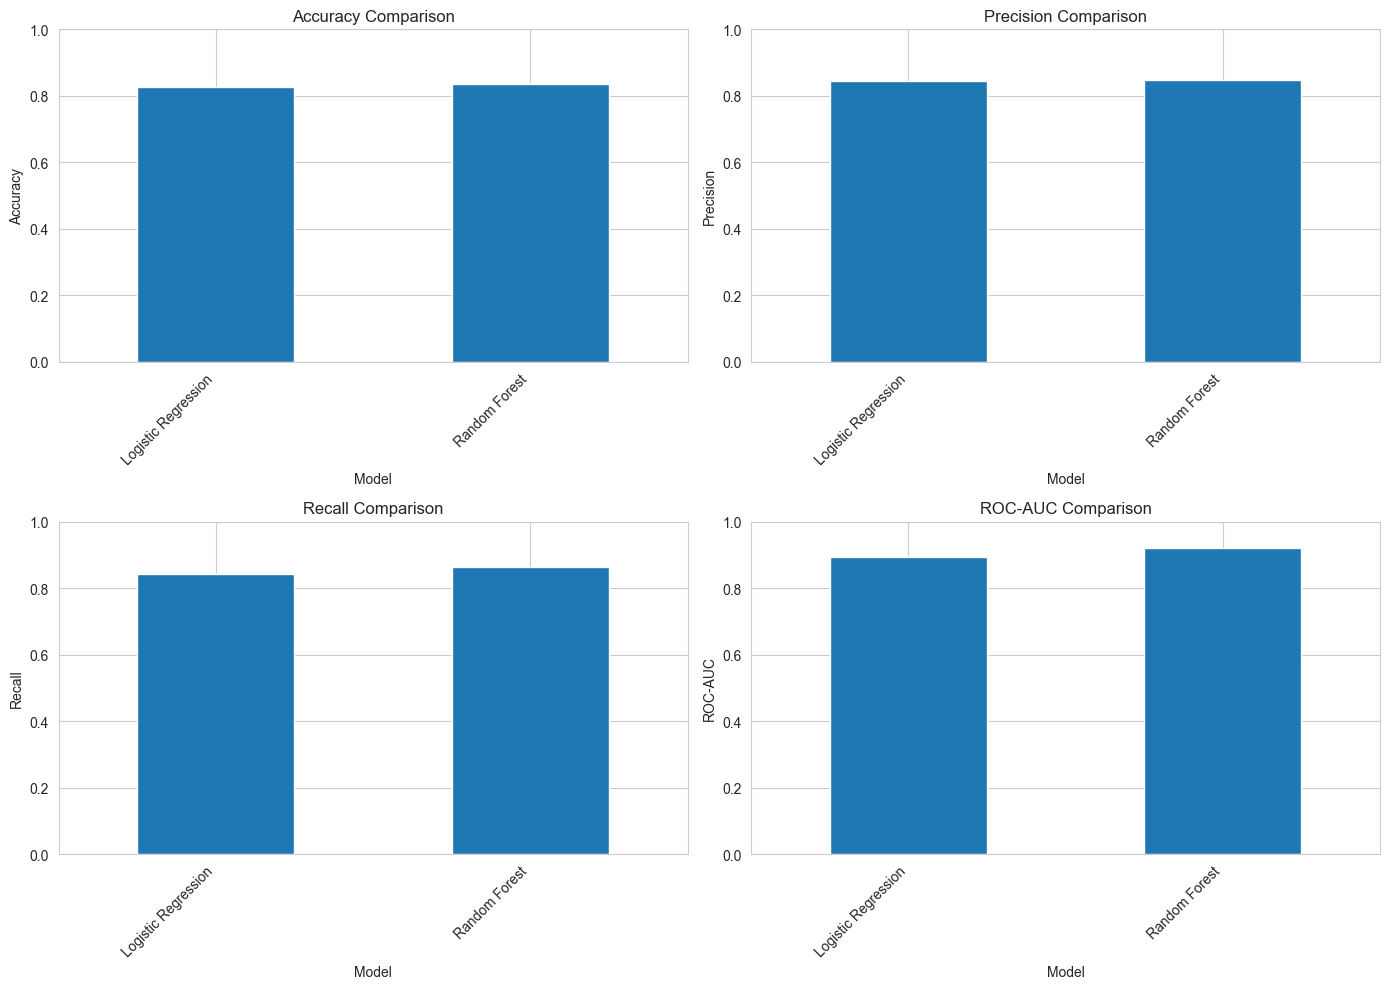

In [7]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_accuracy, rf_accuracy],
    'Precision': [lr_precision, rf_precision],
    'Recall': [lr_recall, rf_recall],
    'ROC-AUC': [lr_roc_auc, rf_roc_auc],
    'CV ROC-AUC Mean': [lr_cv_scores.mean(), rf_cv_scores.mean()],
    'CV ROC-AUC Std': [lr_cv_scores.std(), rf_cv_scores.std()]
})

print("Model Comparison:")
print("=" * 60)
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC-AUC']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    comparison_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_ylim([0, 1])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 8. ROC Curves


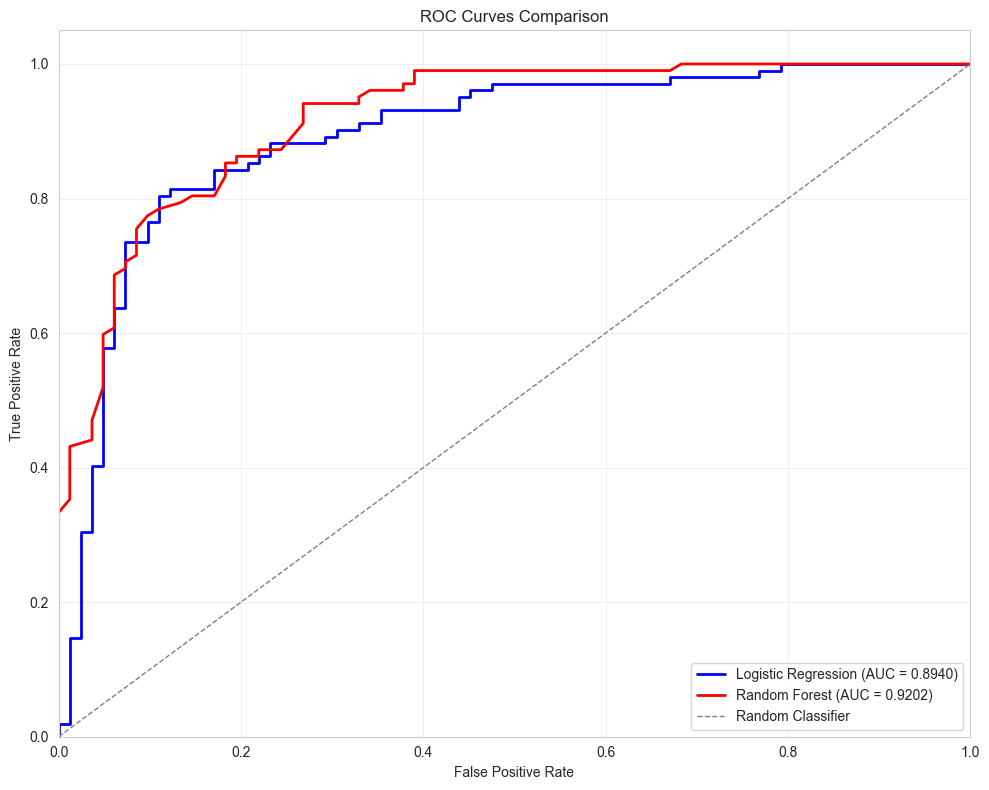

In [8]:
# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, 
         label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, 
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 9. Confusion Matrices


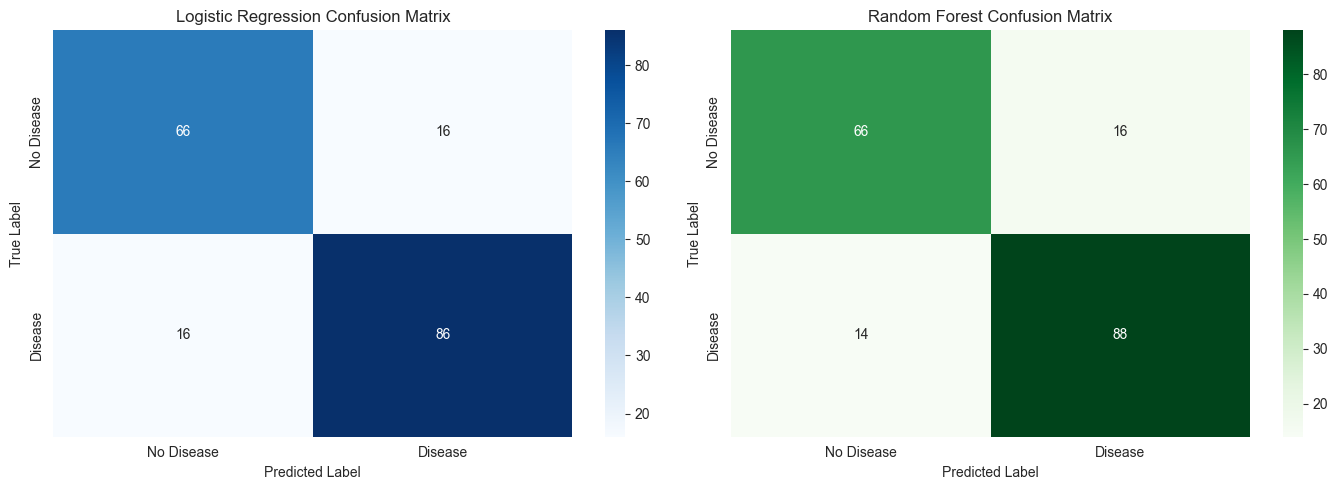

In [9]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()


## 10. Feature Importance (Random Forest)


Feature Importance (Random Forest):
 feature  importance
      cp    0.150377
    chol    0.146165
 thalach    0.132516
     age    0.128284
 oldpeak    0.104506
trestbps    0.079559
   exang    0.077456
    thal    0.052930
     sex    0.039568
 restecg    0.026813
      ca    0.023431
   slope    0.022439
     fbs    0.015954


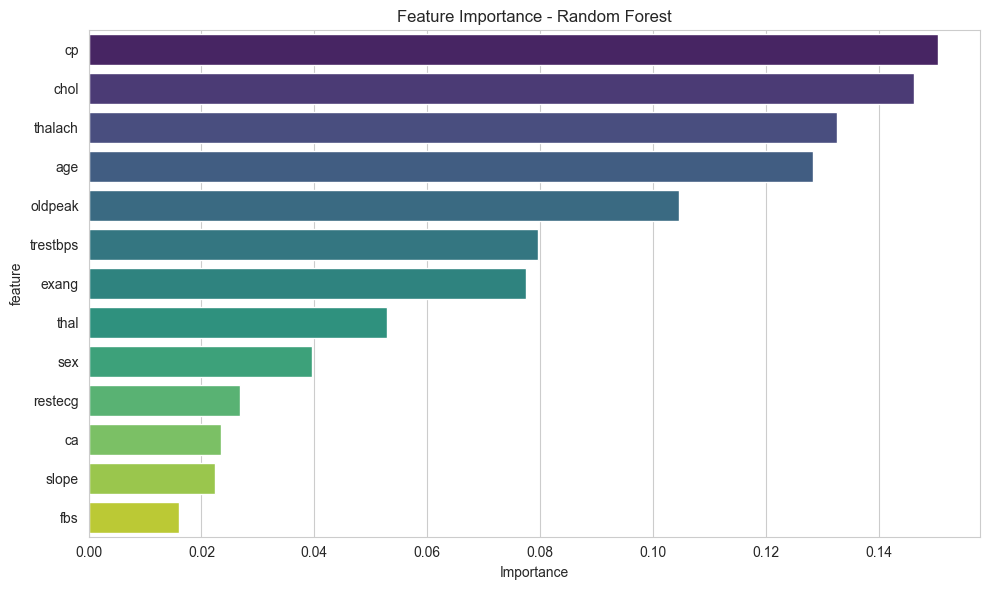

In [10]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print("=" * 60)
print(feature_importance.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


## 11. Model Selection Summary


In [11]:
# Determine best model
best_model = 'Random Forest' if rf_roc_auc > lr_roc_auc else 'Logistic Regression'
best_score = max(rf_roc_auc, lr_roc_auc)

print("Model Selection Summary:")
print("=" * 60)
print(f"Best Model: {best_model}")
print(f"Best ROC-AUC: {best_score:.4f}")
print(f"\nKey Findings:")
print(f"  - Logistic Regression ROC-AUC: {lr_roc_auc:.4f}")
print(f"  - Random Forest ROC-AUC: {rf_roc_auc:.4f}")
print(f"\nRecommendation: Use {best_model} for production deployment.")


Model Selection Summary:
Best Model: Random Forest
Best ROC-AUC: 0.9202

Key Findings:
  - Logistic Regression ROC-AUC: 0.8940
  - Random Forest ROC-AUC: 0.9202

Recommendation: Use Random Forest for production deployment.
